In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
houseData = pd.read_csv('train.csv')

In [4]:
#Question 1a
#Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. Note
#that the classes Y and N are quite unbalanced; do you think this will create any problem in our Classification?

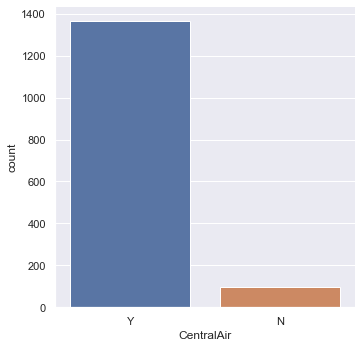

In [5]:
sb.catplot( x = 'CentralAir',data = houseData, kind = 'count')

In [6]:
#Ans: As Samples for not having Central Air Conditioning are relatively small compared to houses with central AC. 
#The accuracy of classification may not be as accurate.

In [7]:
#Question 1b
#Plot houseData['CentralAir'] vs houseData['SalePrice'] using boxplot, and note the strong relationship.
#Also check the mutual relationship by plotting the two variables using a swarmplot, and note the difference.

In [8]:
CentralAirTotal = pd.DataFrame(houseData['CentralAir'])
SalePriceTotal = pd.DataFrame(houseData['SalePrice'])

In [9]:
#Convert CentralAirTotal to Bool Value and Type

        #TempDataSet = self.TotalDataSet
        #TempDataSet = TempDataSet.astype({ VariableStr: 'category'})

In [13]:
#Create a joint dataframe by concatenating 
jointDF = pd.concat([SalePriceTotal, CentralAirTotal.reindex(index=SalePriceTotal.index)], sort = False, axis = 1)

jointDF

SalePrice CentralAir
0        208500          Y
1        181500          Y
2        223500          Y
3        140000          Y
4        250000          Y
...         ...        ...
1455     175000          Y
1456     210000          Y
1457     266500          Y
1458     142125          Y
1459     147500          Y

[1460 rows x 2 columns]

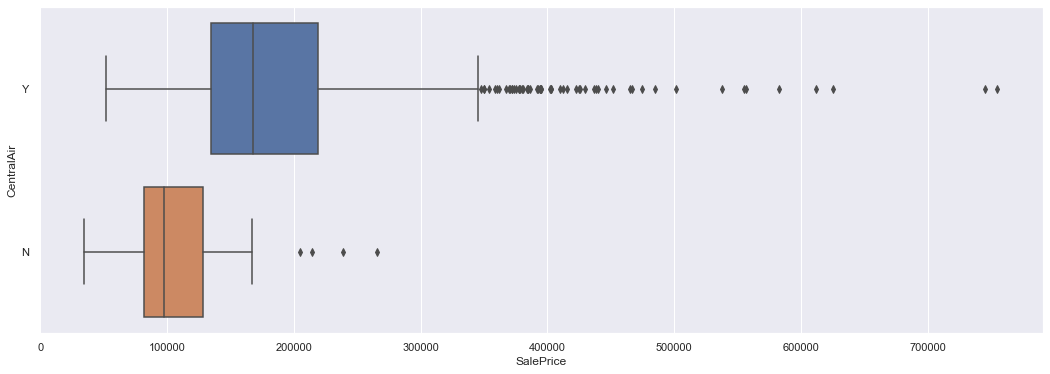

In [12]:
#Compare using a boxplot (CentralAir vs SalesPrice)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

In [14]:
#Compare using a Swarmplot (CentralAir vs SalesPrice)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

In [ ]:
#Question 1C / 1D / 1E
#Import Classification Tree model from Scikit-Learn 
#Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows).
#Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

houseDataTrain, houseDataTest = train_test_split(houseData, test_size = 360/1460)

TrainCentralAir = pd.DataFrame(houseDataTrain['CentralAir'])
TrainSalePrice = pd.DataFrame(houseDataTrain['SalePrice'])

x_Train = TrainSalePrice
y_Train = TrainCentralAir

In [17]:
#Training Classification Model 
DTree = DecisionTreeClassifier(max_depth=2)
DTree.fit(x_Train,y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(DTree,                                        # the model
                          feature_names = x_Train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

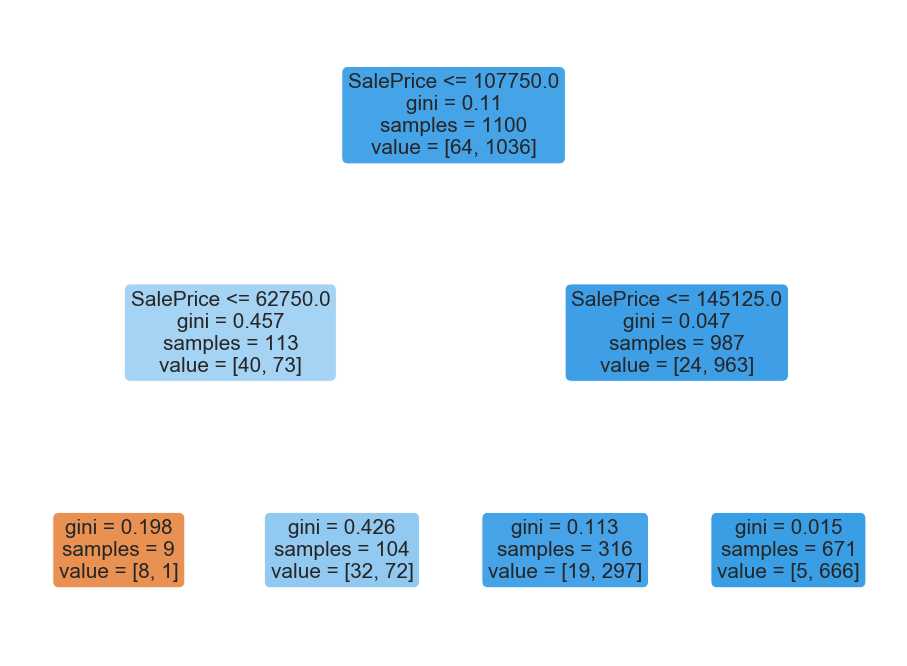

In [20]:
# Import the function plot_tree
from sklearn.tree import plot_tree

# Plot the Decision Tree model
f, axes = plt.subplots(1, 1, figsize=(16, 12))
plot_tree(DTree, filled=True, rounded = True, 
          feature_names=x_Train.columns)
plt.show()

Classification Accuracy 	: 0.9481818181818182
True Negative:  0.8888888888888888
False Postive:  0.1111111111111111
True Postive:  0.9486709440879927
False Negative:  0.051329055912007336


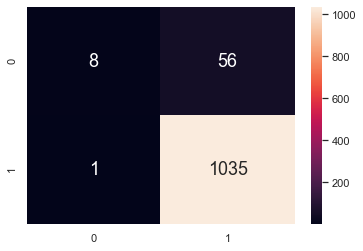

In [31]:
#Model in Relation to Training Data 
#Predict CentralAir using SalesPrice
TrainPredCentralAir = DTree.predict(TrainSalePrice)

#Print the Classification Accuracy
print("Classification Accuracy \t:", DTree.score(TrainSalePrice, TrainCentralAir))

cm = confusion_matrix(TrainCentralAir,TrainPredCentralAir).ravel()
print("True Negative: ",  0 if cm[0] == 0 else cm[0]/(cm[0] + cm[2]))
print("False Postive: ", 0 if cm[2] == 0 else cm[2]/(cm[0] + cm[2]))

print("True Postive: ", 0 if cm[3] == 0 else cm[3]/(cm[1] + cm[3]))
print("False Negative: ",0 if cm[1] ==0 else cm[1]/(cm[1] + cm[3]))


#Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(TrainCentralAir, TrainPredCentralAir), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [32]:
#Define dataFrame for Test Data
TestCentralAir = pd.DataFrame(houseDataTest['CentralAir'])
TestSalePrice = pd.DataFrame(houseDataTest['SalePrice'])

#Model in Relation to Test Data
#Predict CentralAir using SalesPrice
TestPredCentralAir = DTree.predict(TestSalePrice)

#Print the Classification Accuracy
print("Classification Accuracy \t:", DTree.score(TestSalePrice, TestCentralAir))

cm = confusion_matrix(TestCentralAir,TestPredCentralAir).ravel()
print("True Negative: ",  0 if cm[0] == 0 else cm[0]/(cm[0] + cm[2]))
print("False Postive: ", 0 if cm[2] == 0 else cm[2]/(cm[0] + cm[2]))

print("True Postive: ", 0 if cm[3] == 0 else cm[3]/(cm[1] + cm[3]))
print("False Negative: ",0 if cm[1] ==0 else cm[1]/(cm[1] + cm[3]))


#Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(TestCentralAir, TestPredCentralAir), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9222222222222223
True Negative:  0.7142857142857143
False Postive:  0.2857142857142857
True Postive:  0.9263456090651558
False Negative:  0.07365439093484419


In [ ]:
#Question 2
#Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF' one-by-one to obtain individual Decision Trees. Discuss with your Friends about the models, compare the Classification Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'.

In [52]:
GrLivAreaTotal = pd.DataFrame(houseData['GrLivArea'])
LotAreaTotal = pd.DataFrame(houseData['LotArea'])
TotalBsmtSFTotal = pd.DataFrame(houseData['TotalBsmtSF'])

GrLivAreaTrain = pd.DataFrame(houseDataTrain['GrLivArea'])
LotAreaTrain = pd.DataFrame(houseDataTrain['LotArea'])
TotalBsmtSFTrain = pd.DataFrame(houseDataTrain['TotalBsmtSF'])

GrLivAreaTest = pd.DataFrame(houseDataTest['GrLivArea'])
LotAreaTest = pd.DataFrame(houseDataTest['LotArea'])
TotalBsmtSFTest = pd.DataFrame(houseDataTest['TotalBsmtSF'])

GrLivAreajointDF = pd.concat([GrLivAreaTotal , CentralAirTotal.reindex(index=GrLivAreaTotal .index)], sort = False, axis = 1)

LotAreajointDF = pd.concat([LotAreaTotal, CentralAirTotal.reindex(index=LotAreaTotal.index)], sort = False, axis = 1)

TotalBsmtSFjointDF = pd.concat([TotalBsmtSFTotal, CentralAirTotal.reindex(index=TotalBsmtSFTotal.index)], sort = False, axis = 1)



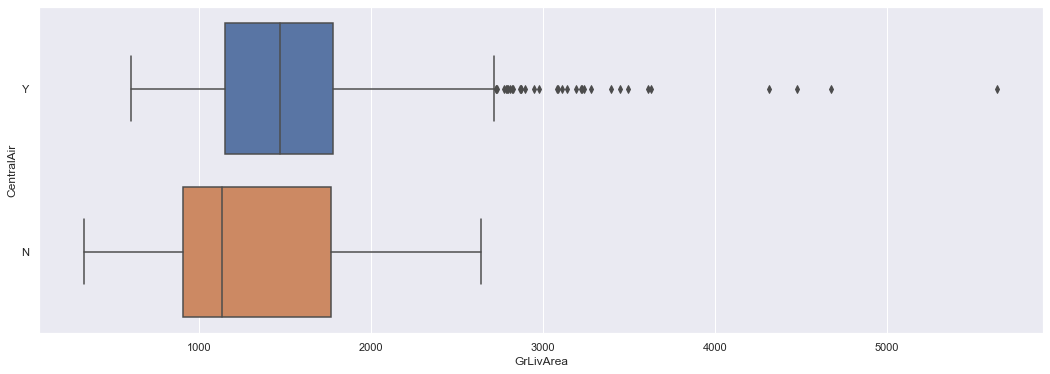

In [53]:
#Compare using a boxplot (CentralAir vs GrLivArea)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "GrLivArea", y = "CentralAir", data = GrLivAreajointDF , orient = "h")

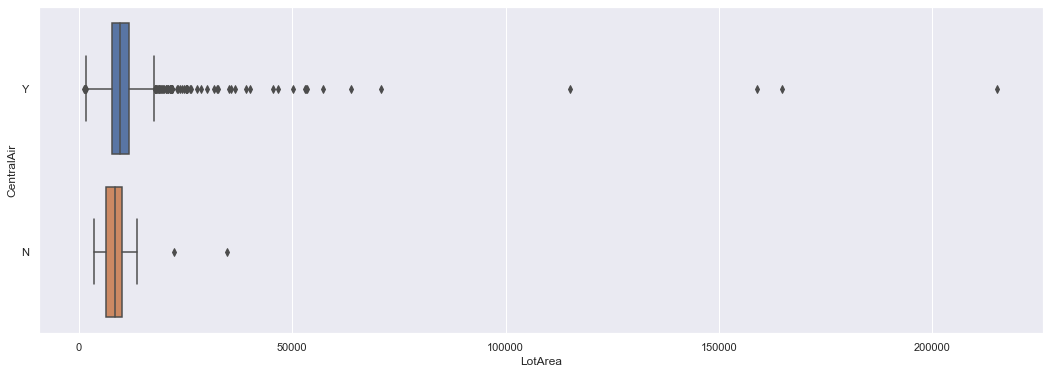

In [37]:
#Compare using a boxplot (CentralAir vs LotArea)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "LotArea", y = "CentralAir", data = LotAreajointDF , orient = "h")

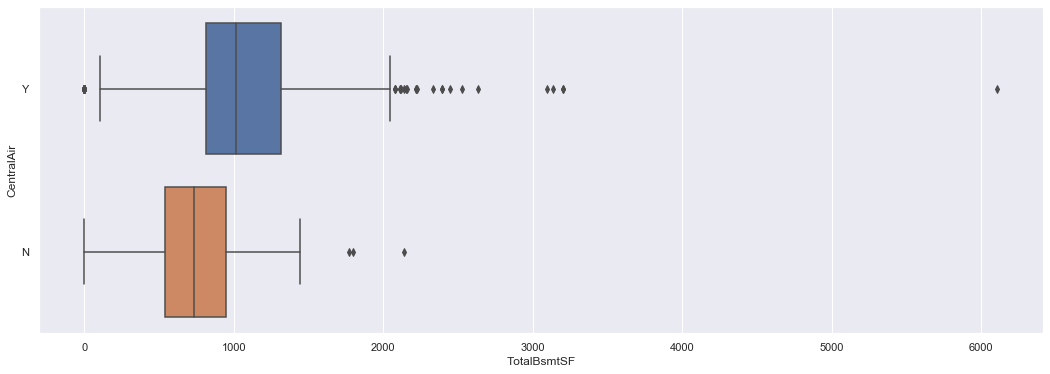

In [38]:
#Compare using a boxplot (CentralAir vs TotalBsmtSF)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "TotalBsmtSF", y = "CentralAir", data = TotalBsmtSFjointDF , orient = "h")

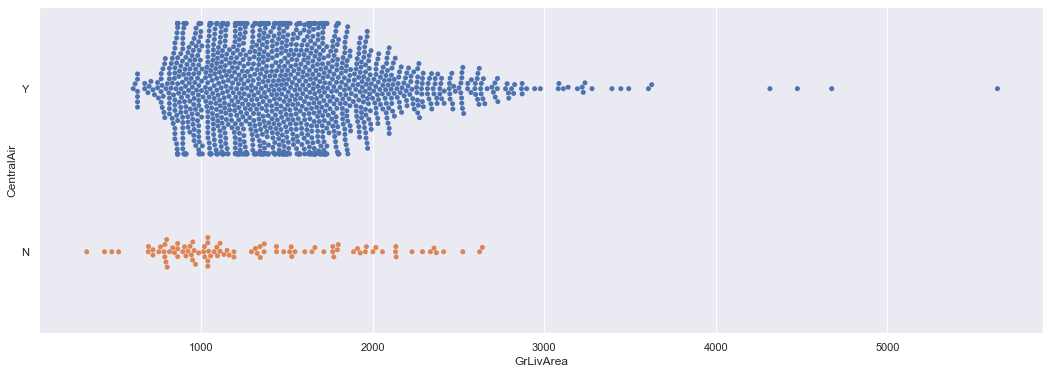

In [48]:
#Compare using a boxplot (CentralAir vs GrLivArea)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "GrLivArea", y = "CentralAir", data = GrLivAreajointDF , orient = "h")

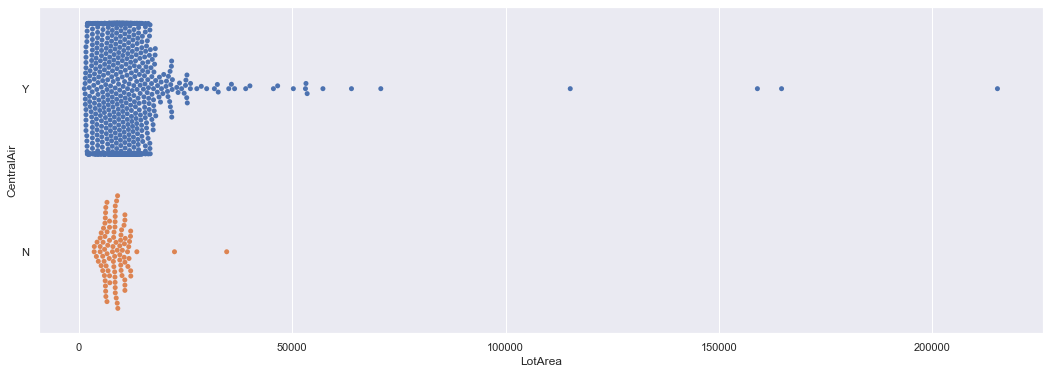

In [47]:
#Compare using a boxplot (CentralAir vs LotArea)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "LotArea", y = "CentralAir", data = LotAreajointDF , orient = "h")

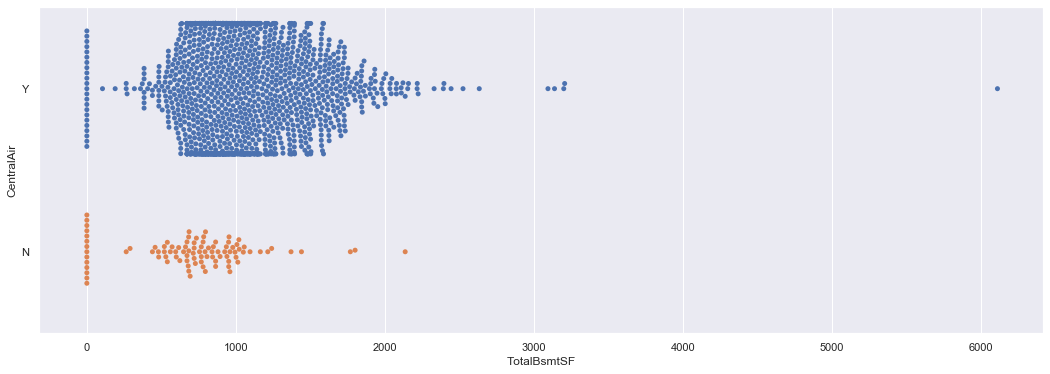

In [45]:
#Compare using a boxplot (CentralAir vs LotArea)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "TotalBsmtSF", y = "CentralAir", data = TotalBsmtSFjointDF , orient = "h")

In [54]:
GrLivAreaDTree = DecisionTreeClassifier(max_depth=2)
LotAreaDTree = DecisionTreeClassifier(max_depth=2)
TotalBsmtSFDTree = DecisionTreeClassifier(max_depth=2)
GrLivAreaDTree.fit(GrLivAreaTrain, TrainCentralAir)
LotAreaDTree.fit(LotAreaTrain, TrainCentralAir)
TotalBsmtSFDTree.fit(TotalBsmtSFTrain, TrainCentralAir)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
# Plot the Decision Tree model (Use for GrLivArea)
f, axes = plt.subplots(1, 1, figsize=(16, 12))
plot_tree(GrLivAreaDTree, filled=True, rounded = True, 
          feature_names=GrLivAreaTrain.columns)
plt.show()

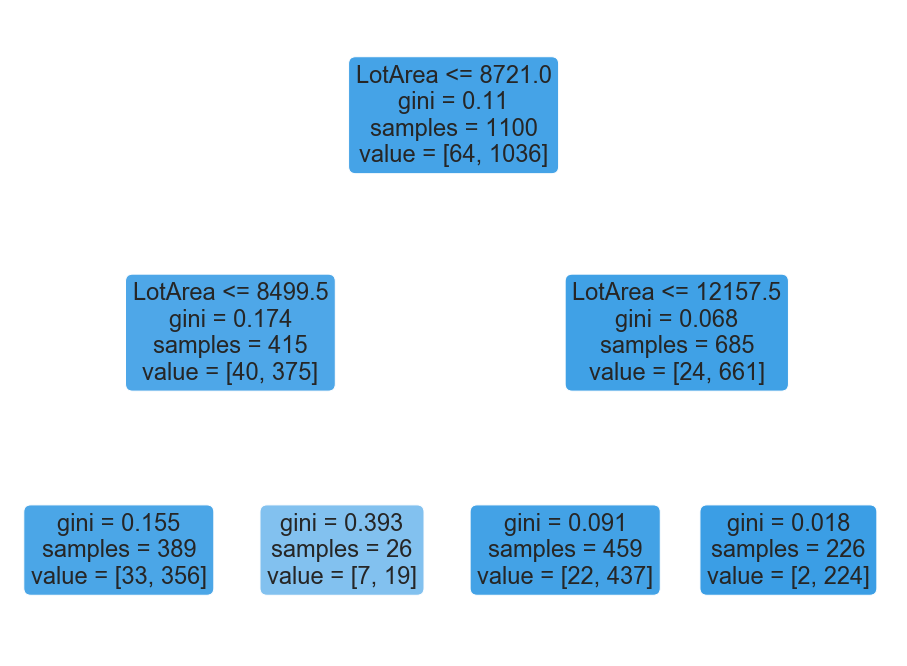

In [56]:
# Plot the Decision Tree model (Use for LotArea)
f, axes = plt.subplots(1, 1, figsize=(16, 12))
plot_tree(LotAreaDTree, filled=True, rounded = True, 
          feature_names=LotAreaTrain.columns)
plt.show()

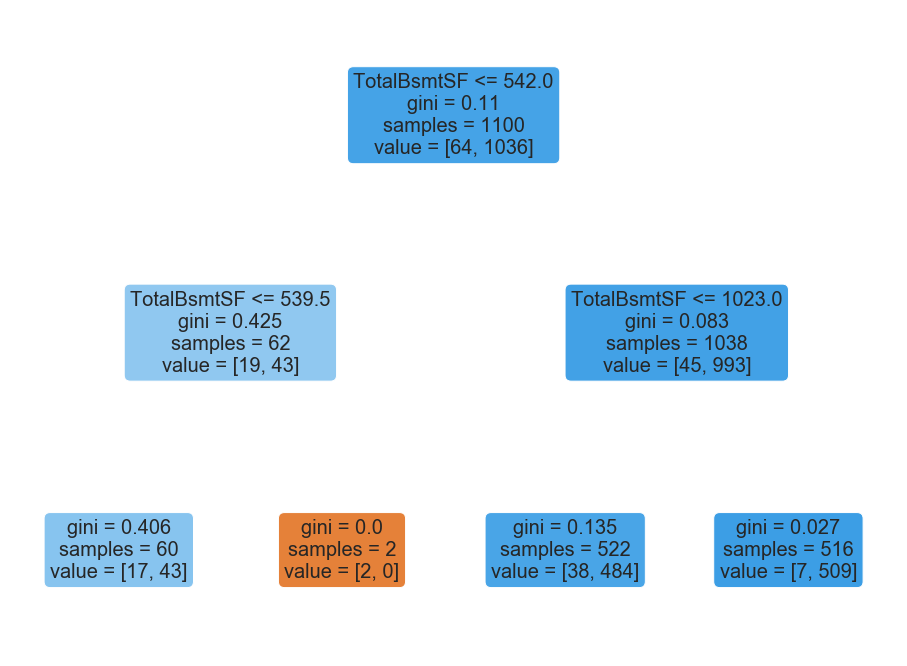

In [58]:
# Plot the Decision Tree model (Use for TotalBsmtSF)
f, axes = plt.subplots(1, 1, figsize=(16, 12))
plot_tree(TotalBsmtSFDTree, filled=True, rounded = True, 
          feature_names=TotalBsmtSFTrain.columns)
plt.show()

In [59]:
#Model in Relation to Training Data 
#Predict CentralAir using GrLivArea
TrainPredCentralAir = GrLivAreaDTree.predict(GrLivAreaTrain)

#Print the Classification Accuracy
print("Classification Accuracy \t:", GrLivAreaDTree.score(GrLivAreaTrain, TrainCentralAir))

cm = confusion_matrix(TrainCentralAir,TrainPredCentralAir).ravel()
print("True Negative: ",  0 if cm[0] == 0 else cm[0]/(cm[0] + cm[2]))
print("False Postive: ", 0 if cm[2] == 0 else cm[2]/(cm[0] + cm[2]))

print("True Postive: ", 0 if cm[3] == 0 else cm[3]/(cm[1] + cm[3]))
print("False Negative: ",0 if cm[1] ==0 else cm[1]/(cm[1] + cm[3]))


#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(TrainCentralAir, TrainPredCentralAir), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9436363636363636
True Negative:  1.0
False Postive:  0.0
True Postive:  0.9435336976320583
False Negative:  0.056466302367941715


Classification Accuracy 	: 0.08611111111111111
True Negative:  1.0
False Postive:  0.0
True Postive:  0.9189944134078212
False Negative:  0.08100558659217877


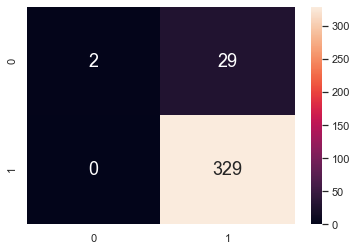

In [60]:
#Model in Relation to Test Data
#Predict CentralAir using GrLivArea
TestPredCentralAir = GrLivAreaDTree.predict(GrLivAreaTest)

#Print the Classification Accuracy
print("Classification Accuracy \t:", DTree.score(GrLivAreaTest, TestCentralAir))

cm = confusion_matrix(TestCentralAir,TestPredCentralAir).ravel()
print("True Negative: ",  0 if cm[0] == 0 else cm[0]/(cm[0] + cm[2]))
print("False Postive: ", 0 if cm[2] == 0 else cm[2]/(cm[0] + cm[2]))

print("True Postive: ", 0 if cm[3] == 0 else cm[3]/(cm[1] + cm[3]))
print("False Negative: ",0 if cm[1] ==0 else cm[1]/(cm[1] + cm[3]))


#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(TestCentralAir, TestPredCentralAir), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9418181818181818
True Negative:  nan
False Postive:  nan
True Postive:  0.9418181818181818
False Negative:  0.05818181818181818
/Users/sky/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/Users/sky/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


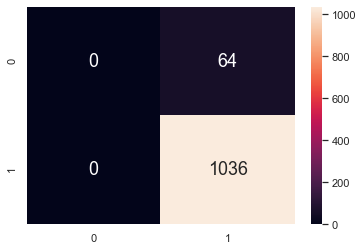

In [63]:
#Model in Relation to Training Data 
#Predict CentralAir using LotArea
TrainPredCentralAir = LotAreaDTree.predict(LotAreaTrain)

#Print the Classification Accuracy
print("Classification Accuracy \t:", LotAreaDTree.score(LotAreaTrain, TrainCentralAir))

cm = confusion_matrix(TrainCentralAir,TrainPredCentralAir).ravel()
print("True Negative: ",  0 if cm[0] == 0 else cm[0]/(cm[0] + cm[2]))
print("False Postive: ", 0 if cm[2] == 0 else cm[2]/(cm[0] + cm[2]))

print("True Postive: ", 0 if cm[3] == 0 else cm[3]/(cm[1] + cm[3]))
print("False Negative: ",0 if cm[1] ==0 else cm[1]/(cm[1] + cm[3]))


#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(TrainCentralAir, TrainPredCentralAir), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9138888888888889
True Negative:  nan
False Postive:  nan
True Postive:  0.9138888888888889
False Negative:  0.08611111111111111
/Users/sky/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/Users/sky/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


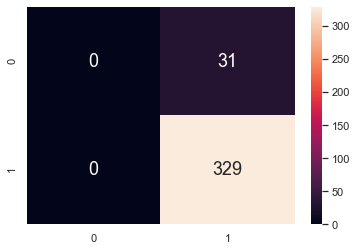

In [65]:
#Model in Relation to Test Data
#Predict CentralAir using LotArea
TestPredCentralAir = LotAreaDTree.predict(LotAreaTest)

#Print the Classification Accuracy
print("Classification Accuracy \t:", LotAreaDTree.score(LotAreaTest, TestCentralAir))

cm = confusion_matrix(TestCentralAir,TestPredCentralAir).ravel()
print("True Negative: ",  0 if cm[0] == 0 else cm[0]/(cm[0] + cm[2]))
print("False Postive: ", 0 if cm[2] == 0 else cm[2]/(cm[0] + cm[2]))

print("True Postive: ", 0 if cm[3] == 0 else cm[3]/(cm[1] + cm[3]))
print("False Negative: ",0 if cm[1] ==0 else cm[1]/(cm[1] + cm[3]))


#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(TestCentralAir, TestPredCentralAir), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9436363636363636
True Negative:  1.0
False Postive:  0.0
True Postive:  0.9435336976320583
False Negative:  0.056466302367941715


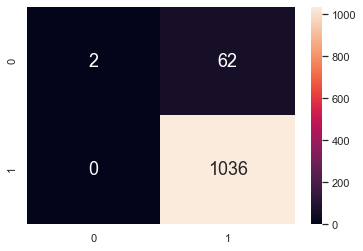

In [66]:
#Model in Relation to Training Data 
#Predict CentralAir using TotalBsmtSF
TrainPredCentralAir = TotalBsmtSFDTree.predict(TotalBsmtSFTrain)

#Print the Classification Accuracy
print("Classification Accuracy \t:", TotalBsmtSFDTree.score(TotalBsmtSFTrain, TrainCentralAir))

cm = confusion_matrix(TrainCentralAir, TrainPredCentralAir).ravel()
print("True Negative: ",  0 if cm[0] == 0 else cm[0]/(cm[0] + cm[2]))
print("False Postive: ", 0 if cm[2] == 0 else cm[2]/(cm[0] + cm[2]))

print("True Postive: ", 0 if cm[3] == 0 else cm[3]/(cm[1] + cm[3]))
print("False Negative: ",0 if cm[1] ==0 else cm[1]/(cm[1] + cm[3]))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(TrainCentralAir, TrainPredCentralAir), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9138888888888889
True Negative:  0
False Postive:  0
True Postive:  0.9138888888888889
False Negative:  0.08611111111111111


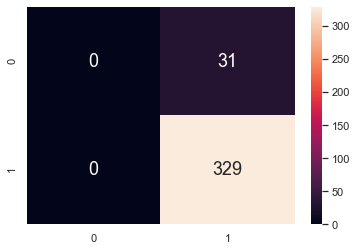

In [73]:
#Model in Relation to Test Data
#Predict CentralAir using TotalBsmtSF
TestPredCentralAir = TotalBsmtSFDTree.predict(TotalBsmtSFTest)

#Print the Classification Accuracy
print("Classification Accuracy \t:", TotalBsmtSFDTree.score(TotalBsmtSFTest, TestCentralAir))

cm = confusion_matrix(TestCentralAir,TestPredCentralAir).ravel()
print("True Negative: ",  0 if cm[0] == 0 else cm[0]/(cm[0] + cm[2]))
print("False Postive: ", 0 if cm[2] == 0 else cm[2]/(cm[0] + cm[2]))

print("True Postive: ", 0 if cm[3] == 0 else cm[3]/(cm[1] + cm[3]))
print("False Negative: ",0 if cm[1] ==0 else cm[1]/(cm[1] + cm[3]))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(TestCentralAir, TestPredCentralAir), 
           annot = True, fmt=".0f", annot_kws={"size": 18})